# Principal Component Analysis

In [1]:
import numpy as np
import urllib.request
import zipfile
import pandas as pd
from sklearn.utils import shuffle
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
url = 'https://firebasestorage.googleapis.com/v0/b/z2tma61d2a74hya815w9x621uszb3a.appspot.com/o/ex7faces.txt.zip?alt=media&token=a70a9581-aeed-4be5-af6e-b21bfa620b87'
local_zip = 'ex7faces.txt.zip'
urllib.request.urlretrieve(url, local_zip)
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [3]:
data = pd.read_table('ex7faces.txt', sep=',', header=None, dtype='float32')
data = shuffle(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
2748,39.133686,39.133686,40.133686,41.133686,41.133686,44.133686,45.133686,45.133686,47.133686,50.133686,...,28.133686,31.133686,34.133686,31.133686,28.133686,26.133686,24.133686,20.133686,21.133686,28.133686
3651,-88.866310,-95.866310,-98.866310,-98.866310,-97.866310,-109.866310,-93.866310,-46.866314,-37.866314,-40.866314,...,-25.866314,-25.866314,-24.866314,-14.866314,-2.866314,1.133686,8.133686,9.133686,4.133686,-2.866314
627,-18.866314,-29.866314,-51.866314,-75.866310,-81.866310,-86.866310,-86.866310,-84.866310,-66.866310,-36.866314,...,-9.866314,-12.866314,-15.866314,-22.866314,-26.866314,-34.866314,-37.866314,-36.866314,-43.866314,-51.866314
2321,-116.866310,-111.866310,-95.866310,-84.866310,-70.866310,-59.866314,-57.866314,-57.866314,-56.866314,-57.866314,...,25.133686,20.133686,16.133686,16.133686,14.133686,4.133686,-5.866314,-8.866314,-13.866314,-25.866314
1770,21.133686,57.133686,39.133686,16.133686,-6.866314,-14.866314,-17.866314,-27.866314,-22.866314,-27.866314,...,-0.866314,-1.866314,-3.866314,-8.866314,-15.866314,-31.866314,-56.866314,-79.866310,-100.866310,-113.866310


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2748 to 2755
Columns: 1024 entries, 0 to 1023
dtypes: float32(1024)
memory usage: 19.6 MB


In [5]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-21.741245,-20.809839,-19.707830,-18.578623,-17.735620,-16.817413,-15.607985,-13.997763,-11.565536,-8.551472,...,-15.578006,-17.168423,-19.029036,-21.321245,-23.807858,-26.378422,-28.230484,-30.326221,-32.117886,-32.968327
std,51.159817,50.362888,49.469162,48.920498,48.313274,47.944035,47.682468,47.618771,47.600681,47.533215,...,47.807014,48.982811,49.920597,50.885582,51.714306,52.367180,53.269032,54.206062,55.392551,56.515320
min,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,...,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310,-127.866310
25%,-60.866314,-58.866314,-54.866314,-53.866314,-51.866314,-50.866314,-47.866314,-46.866314,-43.866314,-40.866314,...,-45.866314,-48.866314,-51.866314,-55.866314,-60.866314,-64.866310,-68.116310,-71.866310,-75.866310,-78.866310
50%,-20.866314,-18.866314,-17.866314,-16.866314,-15.866314,-14.866314,-13.866314,-12.866314,-8.866314,-5.866314,...,-12.866314,-13.866314,-15.866314,-18.866314,-21.866314,-23.866314,-26.866314,-30.866314,-33.866314,-35.866314
75%,15.133686,15.133686,15.133686,16.133686,15.133686,16.133686,17.133686,18.133686,21.133686,25.133686,...,16.133686,15.133686,14.133686,12.133686,11.133686,7.133686,6.133686,4.133686,4.133686,3.133686
max,125.133690,125.133690,127.133690,127.133690,127.133690,127.133690,126.133690,126.133690,126.133690,127.133690,...,126.133690,126.133690,127.133690,127.133690,126.133690,126.133690,126.133690,127.133690,127.133690,127.133690


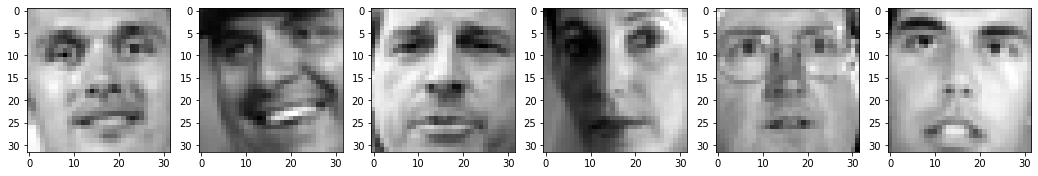

In [6]:
img_1 = np.rot90(np.fliplr(np.reshape(data.iloc[[0],:].values, newshape=(32,32))))
img_2 = np.rot90(np.fliplr(np.reshape(data.iloc[[1],:].values, newshape=(32,32))))
img_3 = np.rot90(np.fliplr(np.reshape(data.iloc[[2],:].values, newshape=(32,32))))
img_4 = np.rot90(np.fliplr(np.reshape(data.iloc[[3],:].values, newshape=(32,32))))
img_5 = np.rot90(np.fliplr(np.reshape(data.iloc[[4],:].values, newshape=(32,32))))
img_6 = np.rot90(np.fliplr(np.reshape(data.iloc[[5],:].values, newshape=(32,32))))

fig = plt.figure(figsize=(18, 3))
ax1 = fig.add_subplot(1, 6, 1)
ax1.imshow(img_1, cmap='gray')
ax2 = fig.add_subplot(1, 6, 2)
ax2.imshow(img_2, cmap='gray')
ax3 = fig.add_subplot(1, 6, 3)
ax3.imshow(img_3, cmap='gray')
ax4 = fig.add_subplot(1, 6, 4)
ax4.imshow(img_4, cmap='gray')
ax5 = fig.add_subplot(1, 6, 5)
ax5.imshow(img_5, cmap='gray')
ax6 = fig.add_subplot(1, 6, 6)
ax6.imshow(img_6, cmap='gray')

In [7]:
X_train = data.values[:4000,:]

X_test = data.values[4000:,:]

In [8]:
class Layer1():
    
    def __init__(self, model, input_dim, output_dim):
        self.model = model
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.build()
        
    def build(self):
        self.weights = []
        self.mu = tf.zeros(shape=(1,self.output_dim), dtype="float32")
        self.sigma = tf.ones(shape=(1,self.output_dim), dtype="float32")

    def __call__(self, inputs):
        return (inputs-self.mu)/self.sigma
    
class Layer2():
    
    def __init__(self, model, input_dim, output_dim):
        self.model = model
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.build()
        
    def add_weight(self, shape):
        weight_init = tf.random.normal(shape=shape, mean=0.0, stddev=0.05, dtype="float32")
        return tf.Variable(initial_value=weight_init, trainable=True)
        
    def build(self):
        self.w = self.add_weight(shape=(self.output_dim, self.input_dim))
        self.weights = [self.w]

    def __call__(self, inputs):
        z = tf.matmul(self.w, tf.transpose(inputs)) 
        return tf.transpose(z)
    
class Layer3():
    
    def __init__(self, model, input_dim, output_dim):
        self.model = model
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.build()
        
    def build(self):
        self.weights = []
        self.mu = tf.zeros(shape=(1,self.output_dim), dtype="float32")
        self.sigma = tf.ones(shape=(1,self.output_dim), dtype="float32")

    def __call__(self, inputs):
        return self.sigma*inputs+self.mu

In [9]:
class LossFunction():
        
    def __init__(self, model, alpha):
        self.model = model
        self.alpha = alpha
            
    def __call__(self, y_true, y_pred):
        loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_true-y_pred), axis=1), axis=0)
        regularization = tf.reduce_sum(tf.abs(tf.transpose(self.model.weights[1])-self.model.weights[0]))
        return loss + self.alpha*regularization

In [10]:
class MetricFunction():
                    
    def __init__(self, model):
        self.model = model
        
    def __call__(self, y_true, y_pred):
        return tf.reduce_mean(tf.reduce_sum(tf.square(y_true-y_pred), axis=1), axis=0)

In [11]:
class Optimizer():

    def __init__(self, model, learning_rate, beta_1, beta_2, epsilon):
        self.model = model
        self.learning_rate = learning_rate
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon= epsilon
        self.stop_training = False
        self.build()
        
    def add_weight(self, shape):
        weight_init = tf.zeros(shape=shape, dtype="float32")
        return  tf.Variable(initial_value=weight_init, trainable=False)
    
    def build(self):
        self.weights = []
        for weight in self.model.weights:
            m = self.add_weight(shape=weight.shape)
            v = self.add_weight(shape=weight.shape)
            self.weights.append([m,v])
            
    def apply(self, grads, weights):
        for i in range(len(weights)):
            w = weights[i]
            grad_w = grads[i]
            m = self.weights[i][0]
            v = self.weights[i][1]
            self.weights[i][0].assign(self.beta_1*m + (1-self.beta_1)*grad_w)  
            self.weights[i][1].assign(self.beta_2*v + (1-self.beta_2)*grad_w*grad_w)
            m_ = (1/(1-self.beta_1))*self.weights[i][0]
            v_ = (1/(1-self.beta_2))*self.weights[i][1]
            weights[i].assign(w - self.learning_rate*m_/(tf.math.sqrt(v_)+self.epsilon))
            
    def train_step(self, X):
        with tf.GradientTape() as tape:
            H = self.model(X)
            loss = self.model.loss(X, H)
        grads = tape.gradient(loss, self.model.weights)
        self.apply(grads, self.model.weights)
        H = self.model(X)
        loss = self.model.loss(X, H)
        metric = self.model.metric(X, H)
        logs = {'loss': loss,
                'metric': metric}
        return logs

In [12]:
class Callback1():

    def __init__(self, model, verbose):
        self.model = model
        self.verbose = verbose
    
    def on_epoch_begin(self, epoch, logs=None):
        self.start_time = tf.timestamp()
        
    def on_epoch_end(self, epoch, logs=None):
        if self.verbose:
            now = tf.timestamp()
            time = now - self.start_time
            tf.print('Epochs {}/{} - Loss: {} - Metric: {}'.format(epoch+1, self.model.epochs, logs['loss'], logs['metric']))
            tf.print('----- {}s -----'.format(tf.round(1000*time)/1000))
            
class Callback2():

    def __init__(self, model):
        self.model = model
        self.history = {'loss':[],
                        'metric':[]}
        
    def on_epoch_end(self, epoch, logs):
        self.history['loss'].append(logs['loss'].numpy())
        self.history['metric'].append(logs['metric'].numpy())
        
    def on_train_end(self):
        self.model.history = self.history

class Callback3():
        
    def __init__(self, model, patience, error, reduce_factor, min_learning_rate):
        self.model = model
        self.patience = patience
        self.error = error
        self.reduce_factor = reduce_factor
        self.min_learning_rate = min_learning_rate
                        
    def on_epoch_end(self, epoch, logs):
        if epoch==0:
            self.loss = logs['loss']
            self.non_decreasing_epochs = 0
        else:
            if ((self.loss-logs['loss'])>self.error):
                self.loss = logs['loss']
                self.non_decreasing_epochs = 0
            else:
                self.non_decreasing_epochs = self.non_decreasing_epochs+1
        if (self.non_decreasing_epochs == self.patience):
            if (self.model.optimizer.learning_rate>self.min_learning_rate):
                self.model.optimizer.learning_rate = self.reduce_factor*self.model.optimizer.learning_rate
                self.non_decreasing_epochs = 0
        
class Callback4():
        
    def __init__(self, model, patience, error):
        self.model = model
        self.patience = patience
        self.error = error
        
    def on_epoch_end(self, epoch, logs):
        if epoch==0:
            self.loss = logs['loss']
            self.non_decreasing_epochs = 0
        else:
            if ((self.loss-logs['loss'])>self.error):
                self.loss = logs['loss']
                self.non_decreasing_epochs = 0
            else:
                self.non_decreasing_epochs = self.non_decreasing_epochs+1
        if (self.non_decreasing_epochs == self.patience):
            self.model.optimizer.stop_training = True

In [13]:
class PCA():
    
    def __init__(self, dims):
        self.dims = dims
        self.build()
     
    def build(self):
        self.layers = []
        self.h1 = Layer1(model=self, input_dim=self.dims[0], output_dim=self.dims[0])
        self.h2 = Layer2(model=self, input_dim=self.dims[0], output_dim=self.dims[1])
        self.h3 = Layer2(model=self, input_dim=self.dims[1], output_dim=self.dims[2])
        self.h4 = Layer3(model=self, input_dim=self.dims[2], output_dim=self.dims[2])
        self.layers = [self.h1, self.h2, self.h3, self.h4]
        self.weights = []
        for layer in self.layers:
            for weight in layer.weights:
                self.weights.append(weight)
                
    def __call__(self, inputs):
        a1 = self.h1(inputs)
        a2 = self.h2(a1)
        a3 = self.h3(a2) 
        y = self.h4(a3)
        return y 
        
    def train_setup(self, epochs, learning_rate, alpha, beta_1, beta_2, epsilon, verbose):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        self.verbose = verbose
        self.loss = LossFunction(model=self, alpha=self.alpha)
        self.metric = MetricFunction(model=self)
        self.optimizer = Optimizer(model=self, learning_rate=self.learning_rate, beta_1=self.beta_1, beta_2=self.beta_2, epsilon=self.epsilon)
        self.callbacks = [Callback1(model=self, verbose=self.verbose),
                          Callback2(model=self),
                          Callback3(model=self, patience=200, error=0.001, reduce_factor=0.1, min_learning_rate=0.001),
                          Callback4(model=self, patience=500, error=0.001)]

    def fit(self, X, epochs=2000, learning_rate=0.01, alpha=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-07, verbose=True):
        self.layers[0].mu = tf.math.reduce_mean(tf.constant(X, dtype="float32"), axis=0)
        self.layers[0].sigma = tf.math.reduce_std(tf.constant(X, dtype="float32"), axis=0)
        self.layers[-1].mu = tf.math.reduce_mean(tf.constant(X, dtype="float32"), axis=0)
        self.layers[-1].sigma = tf.math.reduce_std(tf.constant(X, dtype="float32"), axis=0)
        self.train_setup(epochs, learning_rate, alpha, beta_1, beta_2, epsilon, verbose)
        if verbose:
            tf.print('Train on {} samples'.format(X.shape[0]))
        for epoch in range(epochs):
            self.callbacks[0].on_epoch_begin(epoch)
            logs = self.optimizer.train_step(tf.constant(X, dtype="float32"))
            for callback in self.callbacks:
                callback.on_epoch_end(epoch, logs)
            if self.optimizer.stop_training:
                break
        self.callbacks[1].on_train_end()
    
    def predict(self, inputs):
        return self(tf.constant(inputs, dtype="float32")).numpy()
    
    def encoder(self, inputs):
        y = self.h2(self.h1(tf.constant(inputs, dtype="float32")))
        return y.numpy() 
        
    def decoder(self, inputs):  
        y = self.h4(self.h3(tf.constant(inputs, dtype="float32")))
        return y.numpy()
    
    def evaluate(self, X, Y):
        loss = self.loss(tf.constant(Y, dtype="float32"), self(tf.constant(X, dtype="float32")))
        loss_numpy = loss.numpy()
        metric = self.metric(tf.constant(Y, dtype="float32"), self(tf.constant(X, dtype="float32")))
        metric_numpy = metric.numpy()
        tf.print('Loss: {} - Metric: {}'.format(loss_numpy, metric_numpy))
        return [loss_numpy, metric_numpy]    

In [14]:
pca = PCA(dims=[X_train.shape[1], 100, X_train.shape[1]])

pca.fit(X_train)

Train on 4000 samples
Epochs 1/2000 - Loss: 12709403.0 - Metric: 12708825.0
----- 0.245s -----
Epochs 2/2000 - Loss: 5709771.0 - Metric: 5709200.5
----- 0.159s -----
Epochs 3/2000 - Loss: 33491498.0 - Metric: 33490916.0
----- 0.164s -----
Epochs 4/2000 - Loss: 8043403.0 - Metric: 8042835.0
----- 0.159s -----
Epochs 5/2000 - Loss: 8980754.0 - Metric: 8980187.0
----- 0.195s -----
Epochs 6/2000 - Loss: 13099497.0 - Metric: 13098924.0
----- 0.196s -----
Epochs 7/2000 - Loss: 4841588.0 - Metric: 4841015.0
----- 0.2s -----
Epochs 8/2000 - Loss: 10206138.0 - Metric: 10205566.0
----- 0.166s -----
Epochs 9/2000 - Loss: 2603835.25 - Metric: 2603260.5
----- 0.162s -----
Epochs 10/2000 - Loss: 8993236.0 - Metric: 8992656.0
----- 0.156s -----
Epochs 11/2000 - Loss: 3691721.0 - Metric: 3691141.5
----- 0.174s -----
Epochs 12/2000 - Loss: 4279944.5 - Metric: 4279365.5
----- 0.161s -----
Epochs 13/2000 - Loss: 4277229.5 - Metric: 4276648.5
----- 0.157s -----
Epochs 14/2000 - Loss: 1977528.0 - Metric: 1

Epochs 111/2000 - Loss: 471788.3125 - Metric: 471253.3125
----- 0.171s -----
Epochs 112/2000 - Loss: 469954.1875 - Metric: 469419.5
----- 0.16s -----
Epochs 113/2000 - Loss: 467959.96875 - Metric: 467425.59375
----- 0.155s -----
Epochs 114/2000 - Loss: 466136.15625 - Metric: 465602.125
----- 0.157s -----
Epochs 115/2000 - Loss: 464217.28125 - Metric: 463683.5625
----- 0.167s -----
Epochs 116/2000 - Loss: 462425.3125 - Metric: 461891.9375
----- 0.17s -----
Epochs 117/2000 - Loss: 460586.40625 - Metric: 460053.34375
----- 0.162s -----
Epochs 118/2000 - Loss: 458791.0625 - Metric: 458258.3125
----- 0.161s -----
Epochs 119/2000 - Loss: 457044.3125 - Metric: 456511.875
----- 0.156s -----
Epochs 120/2000 - Loss: 455268.71875 - Metric: 454736.59375
----- 0.147s -----
Epochs 121/2000 - Loss: 453572.5 - Metric: 453040.6875
----- 0.155s -----
Epochs 122/2000 - Loss: 451836.90625 - Metric: 451305.40625
----- 0.156s -----
Epochs 123/2000 - Loss: 450185.3125 - Metric: 449654.09375
----- 0.156s ----

----- 0.154s -----
Epochs 218/2000 - Loss: 343329.40625 - Metric: 342822.15625
----- 0.155s -----
Epochs 219/2000 - Loss: 342535.1875 - Metric: 342028.15625
----- 0.155s -----
Epochs 220/2000 - Loss: 341745.4375 - Metric: 341238.625
----- 0.168s -----
Epochs 221/2000 - Loss: 340960.3125 - Metric: 340453.6875
----- 0.153s -----
Epochs 222/2000 - Loss: 340179.625 - Metric: 339673.21875
----- 0.152s -----
Epochs 223/2000 - Loss: 339403.40625 - Metric: 338897.21875
----- 0.154s -----
Epochs 224/2000 - Loss: 338631.59375 - Metric: 338125.59375
----- 0.159s -----
Epochs 225/2000 - Loss: 337864.375 - Metric: 337358.59375
----- 0.153s -----
Epochs 226/2000 - Loss: 337101.28125 - Metric: 336595.71875
----- 0.16s -----
Epochs 227/2000 - Loss: 336342.5625 - Metric: 335837.1875
----- 0.151s -----
Epochs 228/2000 - Loss: 335588.125 - Metric: 335082.96875
----- 0.15s -----
Epochs 229/2000 - Loss: 334837.875 - Metric: 334332.90625
----- 0.154s -----
Epochs 230/2000 - Loss: 334092.0 - Metric: 333587.2

----- 0.154s -----
Epochs 325/2000 - Loss: 278788.75 - Metric: 278301.0
----- 0.151s -----
Epochs 326/2000 - Loss: 278337.25 - Metric: 277849.65625
----- 0.15s -----
Epochs 327/2000 - Loss: 277887.84375 - Metric: 277400.40625
----- 0.156s -----
Epochs 328/2000 - Loss: 277440.53125 - Metric: 276953.25
----- 0.148s -----
Epochs 329/2000 - Loss: 276995.40625 - Metric: 276508.28125
----- 0.15s -----
Epochs 330/2000 - Loss: 276552.34375 - Metric: 276065.375
----- 0.152s -----
Epochs 331/2000 - Loss: 276111.34375 - Metric: 275624.53125
----- 0.154s -----
Epochs 332/2000 - Loss: 275672.40625 - Metric: 275185.75
----- 0.154s -----
Epochs 333/2000 - Loss: 275235.4375 - Metric: 274748.9375
----- 0.161s -----
Epochs 334/2000 - Loss: 274800.65625 - Metric: 274314.3125
----- 0.157s -----
Epochs 335/2000 - Loss: 274367.75 - Metric: 273881.5625
----- 0.155s -----
Epochs 336/2000 - Loss: 273936.96875 - Metric: 273450.9375
----- 0.153s -----
Epochs 337/2000 - Loss: 273508.03125 - Metric: 273022.15625
-

----- 0.153s -----
Epochs 430/2000 - Loss: 240716.71875 - Metric: 240243.8125
----- 0.154s -----
Epochs 431/2000 - Loss: 240426.328125 - Metric: 239953.546875
----- 0.152s -----
Epochs 432/2000 - Loss: 240137.015625 - Metric: 239664.359375
----- 0.15s -----
Epochs 433/2000 - Loss: 239848.78125 - Metric: 239376.25
----- 0.157s -----
Epochs 434/2000 - Loss: 239561.53125 - Metric: 239089.125
----- 0.157s -----
Epochs 435/2000 - Loss: 239275.484375 - Metric: 238803.203125
----- 0.156s -----
Epochs 436/2000 - Loss: 238990.359375 - Metric: 238518.203125
----- 0.152s -----
Epochs 437/2000 - Loss: 238706.375 - Metric: 238234.34375
----- 0.159s -----
Epochs 438/2000 - Loss: 238423.40625 - Metric: 237951.5
----- 0.15s -----
Epochs 439/2000 - Loss: 238141.484375 - Metric: 237669.703125
----- 0.159s -----
Epochs 440/2000 - Loss: 237860.53125 - Metric: 237388.890625
----- 0.154s -----
Epochs 441/2000 - Loss: 237580.65625 - Metric: 237109.125
----- 0.154s -----
Epochs 442/2000 - Loss: 237301.78125 -

----- 0.186s -----
Epochs 534/2000 - Loss: 215344.390625 - Metric: 214883.625
----- 0.173s -----
Epochs 535/2000 - Loss: 215139.875 - Metric: 214679.203125
----- 0.167s -----
Epochs 536/2000 - Loss: 214935.921875 - Metric: 214475.359375
----- 0.17s -----
Epochs 537/2000 - Loss: 214732.703125 - Metric: 214272.25
----- 0.167s -----
Epochs 538/2000 - Loss: 214530.046875 - Metric: 214069.703125
----- 0.179s -----
Epochs 539/2000 - Loss: 214327.921875 - Metric: 213867.6875
----- 0.17s -----
Epochs 540/2000 - Loss: 214126.5625 - Metric: 213666.4375
----- 0.182s -----
Epochs 541/2000 - Loss: 213925.734375 - Metric: 213465.703125
----- 0.178s -----
Epochs 542/2000 - Loss: 213725.46875 - Metric: 213265.546875
----- 0.179s -----
Epochs 543/2000 - Loss: 213525.890625 - Metric: 213066.078125
----- 0.184s -----
Epochs 544/2000 - Loss: 213326.828125 - Metric: 212867.125
----- 0.186s -----
Epochs 545/2000 - Loss: 213128.421875 - Metric: 212668.8125
----- 0.185s -----
Epochs 546/2000 - Loss: 212930.64

----- 0.174s -----
Epochs 638/2000 - Loss: 196949.875 - Metric: 196499.453125
----- 0.164s -----
Epochs 639/2000 - Loss: 196797.171875 - Metric: 196346.84375
----- 0.169s -----
Epochs 640/2000 - Loss: 196644.90625 - Metric: 196194.65625
----- 0.164s -----
Epochs 641/2000 - Loss: 196492.984375 - Metric: 196042.828125
----- 0.164s -----
Epochs 642/2000 - Loss: 196341.453125 - Metric: 195891.390625
----- 0.167s -----
Epochs 643/2000 - Loss: 196190.328125 - Metric: 195740.359375
----- 0.165s -----
Epochs 644/2000 - Loss: 196039.578125 - Metric: 195589.703125
----- 0.163s -----
Epochs 645/2000 - Loss: 195889.171875 - Metric: 195439.390625
----- 0.168s -----
Epochs 646/2000 - Loss: 195739.28125 - Metric: 195289.59375
----- 0.17s -----
Epochs 647/2000 - Loss: 195589.6875 - Metric: 195140.09375
----- 0.167s -----
Epochs 648/2000 - Loss: 195440.53125 - Metric: 194991.015625
----- 0.209s -----
Epochs 649/2000 - Loss: 195291.671875 - Metric: 194842.25
----- 0.165s -----
Epochs 650/2000 - Loss: 19

----- 0.162s -----
Epochs 742/2000 - Loss: 182921.28125 - Metric: 182479.90625
----- 0.166s -----
Epochs 743/2000 - Loss: 182802.265625 - Metric: 182360.96875
----- 0.159s -----
Epochs 744/2000 - Loss: 182683.5625 - Metric: 182242.34375
----- 0.158s -----
Epochs 745/2000 - Loss: 182565.09375 - Metric: 182123.96875
----- 0.161s -----
Epochs 746/2000 - Loss: 182446.921875 - Metric: 182005.875
----- 0.187s -----
Epochs 747/2000 - Loss: 182328.90625 - Metric: 181887.9375
----- 0.165s -----
Epochs 748/2000 - Loss: 182211.265625 - Metric: 181770.375
----- 0.161s -----
Epochs 749/2000 - Loss: 182093.84375 - Metric: 181653.03125
----- 0.161s -----
Epochs 750/2000 - Loss: 181976.65625 - Metric: 181535.9375
----- 0.157s -----
Epochs 751/2000 - Loss: 181859.75 - Metric: 181419.109375
----- 0.158s -----
Epochs 752/2000 - Loss: 181743.125 - Metric: 181302.5625
----- 0.167s -----
Epochs 753/2000 - Loss: 181626.6875 - Metric: 181186.203125
----- 0.153s -----
Epochs 754/2000 - Loss: 181510.578125 - Me

----- 0.154s -----
Epochs 846/2000 - Loss: 171812.546875 - Metric: 171379.234375
----- 0.152s -----
Epochs 847/2000 - Loss: 171716.875 - Metric: 171283.640625
----- 0.156s -----
Epochs 848/2000 - Loss: 171621.3125 - Metric: 171188.15625
----- 0.153s -----
Epochs 849/2000 - Loss: 171525.953125 - Metric: 171092.859375
----- 0.156s -----
Epochs 850/2000 - Loss: 171430.84375 - Metric: 170997.828125
----- 0.156s -----
Epochs 851/2000 - Loss: 171335.84375 - Metric: 170902.90625
----- 0.16s -----
Epochs 852/2000 - Loss: 171241.046875 - Metric: 170808.171875
----- 0.159s -----
Epochs 853/2000 - Loss: 171146.5 - Metric: 170713.703125
----- 0.161s -----
Epochs 854/2000 - Loss: 171052.046875 - Metric: 170619.328125
----- 0.159s -----
Epochs 855/2000 - Loss: 170957.875 - Metric: 170525.21875
----- 0.154s -----
Epochs 856/2000 - Loss: 170863.796875 - Metric: 170431.21875
----- 0.155s -----
Epochs 857/2000 - Loss: 170769.921875 - Metric: 170337.421875
----- 0.157s -----
Epochs 858/2000 - Loss: 17067

----- 0.16s -----
Epochs 950/2000 - Loss: 162782.25 - Metric: 162356.1875
----- 0.154s -----
Epochs 951/2000 - Loss: 162703.734375 - Metric: 162277.734375
----- 0.154s -----
Epochs 952/2000 - Loss: 162625.359375 - Metric: 162199.421875
----- 0.153s -----
Epochs 953/2000 - Loss: 162547.15625 - Metric: 162121.28125
----- 0.154s -----
Epochs 954/2000 - Loss: 162469.0625 - Metric: 162043.25
----- 0.155s -----
Epochs 955/2000 - Loss: 162391.109375 - Metric: 161965.375
----- 0.155s -----
Epochs 956/2000 - Loss: 162313.28125 - Metric: 161887.609375
----- 0.154s -----
Epochs 957/2000 - Loss: 162235.625 - Metric: 161810.015625
----- 0.161s -----
Epochs 958/2000 - Loss: 162158.109375 - Metric: 161732.5625
----- 0.168s -----
Epochs 959/2000 - Loss: 162080.71875 - Metric: 161655.234375
----- 0.159s -----
Epochs 960/2000 - Loss: 162003.515625 - Metric: 161578.109375
----- 0.155s -----
Epochs 961/2000 - Loss: 161926.390625 - Metric: 161501.046875
----- 0.157s -----
Epochs 962/2000 - Loss: 161849.468

Epochs 1053/2000 - Loss: 155405.09375 - Metric: 154985.5
----- 0.16s -----
Epochs 1054/2000 - Loss: 155340.03125 - Metric: 154920.5
----- 0.16s -----
Epochs 1055/2000 - Loss: 155275.125 - Metric: 154855.65625
----- 0.16s -----
Epochs 1056/2000 - Loss: 155210.25 - Metric: 154790.84375
----- 0.163s -----
Epochs 1057/2000 - Loss: 155145.59375 - Metric: 154726.234375
----- 0.16s -----
Epochs 1058/2000 - Loss: 155081.0 - Metric: 154661.703125
----- 0.159s -----
Epochs 1059/2000 - Loss: 155016.5 - Metric: 154597.265625
----- 0.158s -----
Epochs 1060/2000 - Loss: 154952.140625 - Metric: 154532.96875
----- 0.172s -----
Epochs 1061/2000 - Loss: 154887.921875 - Metric: 154468.8125
----- 0.159s -----
Epochs 1062/2000 - Loss: 154823.765625 - Metric: 154404.703125
----- 0.152s -----
Epochs 1063/2000 - Loss: 154759.765625 - Metric: 154340.765625
----- 0.161s -----
Epochs 1064/2000 - Loss: 154695.875 - Metric: 154276.9375
----- 0.159s -----
Epochs 1065/2000 - Loss: 154632.09375 - Metric: 154213.21875

----- 0.158s -----
Epochs 1156/2000 - Loss: 149282.46875 - Metric: 148868.796875
----- 0.16s -----
Epochs 1157/2000 - Loss: 149228.4375 - Metric: 148814.8125
----- 0.161s -----
Epochs 1158/2000 - Loss: 149174.4375 - Metric: 148760.875
----- 0.156s -----
Epochs 1159/2000 - Loss: 149120.546875 - Metric: 148707.03125
----- 0.157s -----
Epochs 1160/2000 - Loss: 149066.765625 - Metric: 148653.3125
----- 0.158s -----
Epochs 1161/2000 - Loss: 149013.015625 - Metric: 148599.609375
----- 0.157s -----
Epochs 1162/2000 - Loss: 148959.421875 - Metric: 148546.078125
----- 0.156s -----
Epochs 1163/2000 - Loss: 148905.9375 - Metric: 148492.640625
----- 0.167s -----
Epochs 1164/2000 - Loss: 148852.546875 - Metric: 148439.3125
----- 0.168s -----
Epochs 1165/2000 - Loss: 148799.203125 - Metric: 148386.015625
----- 0.164s -----
Epochs 1166/2000 - Loss: 148745.984375 - Metric: 148332.859375
----- 0.155s -----
Epochs 1167/2000 - Loss: 148692.859375 - Metric: 148279.78125
----- 0.154s -----
Epochs 1168/2000

----- 0.154s -----
Epochs 1259/2000 - Loss: 144185.953125 - Metric: 143777.703125
----- 0.162s -----
Epochs 1260/2000 - Loss: 144140.90625 - Metric: 143732.703125
----- 0.158s -----
Epochs 1261/2000 - Loss: 144095.859375 - Metric: 143687.703125
----- 0.155s -----
Epochs 1262/2000 - Loss: 144050.953125 - Metric: 143642.859375
----- 0.151s -----
Epochs 1263/2000 - Loss: 144006.125 - Metric: 143598.078125
----- 0.155s -----
Epochs 1264/2000 - Loss: 143961.359375 - Metric: 143553.359375
----- 0.15s -----
Epochs 1265/2000 - Loss: 143916.671875 - Metric: 143508.71875
----- 0.163s -----
Epochs 1266/2000 - Loss: 143872.015625 - Metric: 143464.125
----- 0.167s -----
Epochs 1267/2000 - Loss: 143827.53125 - Metric: 143419.6875
----- 0.159s -----
Epochs 1268/2000 - Loss: 143783.09375 - Metric: 143375.296875
----- 0.158s -----
Epochs 1269/2000 - Loss: 143738.6875 - Metric: 143330.9375
----- 0.157s -----
Epochs 1270/2000 - Loss: 143694.453125 - Metric: 143286.75
----- 0.16s -----
Epochs 1271/2000 - 

----- 0.154s -----
Epochs 1362/2000 - Loss: 139934.5625 - Metric: 139531.328125
----- 0.16s -----
Epochs 1363/2000 - Loss: 139896.953125 - Metric: 139493.765625
----- 0.159s -----
Epochs 1364/2000 - Loss: 139859.359375 - Metric: 139456.21875
----- 0.157s -----
Epochs 1365/2000 - Loss: 139821.875 - Metric: 139418.78125
----- 0.156s -----
Epochs 1366/2000 - Loss: 139784.453125 - Metric: 139381.40625
----- 0.157s -----
Epochs 1367/2000 - Loss: 139747.0625 - Metric: 139344.0625
----- 0.156s -----
Epochs 1368/2000 - Loss: 139709.796875 - Metric: 139306.84375
----- 0.16s -----
Epochs 1369/2000 - Loss: 139672.53125 - Metric: 139269.625
----- 0.157s -----
Epochs 1370/2000 - Loss: 139635.375 - Metric: 139232.515625
----- 0.173s -----
Epochs 1371/2000 - Loss: 139598.296875 - Metric: 139195.484375
----- 0.159s -----
Epochs 1372/2000 - Loss: 139561.265625 - Metric: 139158.5
----- 0.158s -----
Epochs 1373/2000 - Loss: 139524.25 - Metric: 139121.53125
----- 0.16s -----
Epochs 1374/2000 - Loss: 13948

----- 0.161s -----
Epochs 1465/2000 - Loss: 136385.875 - Metric: 135987.296875
----- 0.16s -----
Epochs 1466/2000 - Loss: 136354.453125 - Metric: 135955.921875
----- 0.159s -----
Epochs 1467/2000 - Loss: 136323.0625 - Metric: 135924.578125
----- 0.168s -----
Epochs 1468/2000 - Loss: 136291.78125 - Metric: 135893.34375
----- 0.158s -----
Epochs 1469/2000 - Loss: 136260.53125 - Metric: 135862.140625
----- 0.158s -----
Epochs 1470/2000 - Loss: 136229.375 - Metric: 135831.015625
----- 0.157s -----
Epochs 1471/2000 - Loss: 136198.21875 - Metric: 135799.90625
----- 0.158s -----
Epochs 1472/2000 - Loss: 136167.125 - Metric: 135768.859375
----- 0.16s -----
Epochs 1473/2000 - Loss: 136136.109375 - Metric: 135737.890625
----- 0.163s -----
Epochs 1474/2000 - Loss: 136105.140625 - Metric: 135706.96875
----- 0.184s -----
Epochs 1475/2000 - Loss: 136074.21875 - Metric: 135676.078125
----- 0.165s -----
Epochs 1476/2000 - Loss: 136043.359375 - Metric: 135645.265625
----- 0.162s -----
Epochs 1477/2000 

----- 0.156s -----
Epochs 1568/2000 - Loss: 133422.75 - Metric: 133028.546875
----- 0.157s -----
Epochs 1569/2000 - Loss: 133396.546875 - Metric: 133002.375
----- 0.153s -----
Epochs 1570/2000 - Loss: 133370.34375 - Metric: 132976.21875
----- 0.156s -----
Epochs 1571/2000 - Loss: 133344.171875 - Metric: 132950.09375
----- 0.157s -----
Epochs 1572/2000 - Loss: 133318.109375 - Metric: 132924.0625
----- 0.16s -----
Epochs 1573/2000 - Loss: 133292.046875 - Metric: 132898.046875
----- 0.157s -----
Epochs 1574/2000 - Loss: 133266.015625 - Metric: 132872.0625
----- 0.156s -----
Epochs 1575/2000 - Loss: 133240.046875 - Metric: 132846.125
----- 0.156s -----
Epochs 1576/2000 - Loss: 133214.125 - Metric: 132820.25
----- 0.153s -----
Epochs 1577/2000 - Loss: 133188.25 - Metric: 132794.40625
----- 0.174s -----
Epochs 1578/2000 - Loss: 133162.390625 - Metric: 132768.59375
----- 0.165s -----
Epochs 1579/2000 - Loss: 133136.609375 - Metric: 132742.859375
----- 0.162s -----
Epochs 1580/2000 - Loss: 133

----- 0.165s -----
Epochs 1671/2000 - Loss: 130943.2265625 - Metric: 130553.1328125
----- 0.169s -----
Epochs 1672/2000 - Loss: 130921.234375 - Metric: 130531.1796875
----- 0.158s -----
Epochs 1673/2000 - Loss: 130899.25 - Metric: 130509.234375
----- 0.157s -----
Epochs 1674/2000 - Loss: 130877.3046875 - Metric: 130487.328125
----- 0.204s -----
Epochs 1675/2000 - Loss: 130855.40625 - Metric: 130465.46875
----- 0.188s -----
Epochs 1676/2000 - Loss: 130833.53125 - Metric: 130443.6328125
----- 0.182s -----
Epochs 1677/2000 - Loss: 130811.703125 - Metric: 130421.84375
----- 0.155s -----
Epochs 1678/2000 - Loss: 130789.9140625 - Metric: 130400.09375
----- 0.157s -----
Epochs 1679/2000 - Loss: 130768.1796875 - Metric: 130378.3984375
----- 0.168s -----
Epochs 1680/2000 - Loss: 130746.46875 - Metric: 130356.7265625
----- 0.183s -----
Epochs 1681/2000 - Loss: 130724.7734375 - Metric: 130335.0703125
----- 0.166s -----
Epochs 1682/2000 - Loss: 130703.1015625 - Metric: 130313.4375
----- 0.161s ---

----- 0.154s -----
Epochs 1771/2000 - Loss: 128913.21875 - Metric: 128526.9296875
----- 0.157s -----
Epochs 1772/2000 - Loss: 128894.5546875 - Metric: 128508.3046875
----- 0.156s -----
Epochs 1773/2000 - Loss: 128875.90625 - Metric: 128489.6953125
----- 0.157s -----
Epochs 1774/2000 - Loss: 128857.265625 - Metric: 128471.0859375
----- 0.164s -----
Epochs 1775/2000 - Loss: 128838.6875 - Metric: 128452.546875
----- 0.16s -----
Epochs 1776/2000 - Loss: 128820.1328125 - Metric: 128434.03125
----- 0.157s -----
Epochs 1777/2000 - Loss: 128801.609375 - Metric: 128415.546875
----- 0.155s -----
Epochs 1778/2000 - Loss: 128783.09375 - Metric: 128397.0625
----- 0.157s -----
Epochs 1779/2000 - Loss: 128764.6640625 - Metric: 128378.671875
----- 0.161s -----
Epochs 1780/2000 - Loss: 128746.2109375 - Metric: 128360.2578125
----- 0.156s -----
Epochs 1781/2000 - Loss: 128727.828125 - Metric: 128341.90625
----- 0.159s -----
Epochs 1782/2000 - Loss: 128709.4375 - Metric: 128323.5546875
----- 0.157s -----

----- 0.156s -----
Epochs 1871/2000 - Loss: 127184.5703125 - Metric: 126801.921875
----- 0.159s -----
Epochs 1872/2000 - Loss: 127168.6015625 - Metric: 126785.9921875
----- 0.158s -----
Epochs 1873/2000 - Loss: 127152.6640625 - Metric: 126770.0859375
----- 0.153s -----
Epochs 1874/2000 - Loss: 127136.765625 - Metric: 126754.2265625
----- 0.155s -----
Epochs 1875/2000 - Loss: 127120.8671875 - Metric: 126738.359375
----- 0.157s -----
Epochs 1876/2000 - Loss: 127105.0 - Metric: 126722.53125
----- 0.158s -----
Epochs 1877/2000 - Loss: 127089.140625 - Metric: 126706.703125
----- 0.156s -----
Epochs 1878/2000 - Loss: 127073.3203125 - Metric: 126690.921875
----- 0.157s -----
Epochs 1879/2000 - Loss: 127057.5625 - Metric: 126675.203125
----- 0.159s -----
Epochs 1880/2000 - Loss: 127041.765625 - Metric: 126659.4375
----- 0.156s -----
Epochs 1881/2000 - Loss: 127026.0 - Metric: 126643.7109375
----- 0.157s -----
Epochs 1882/2000 - Loss: 127010.2890625 - Metric: 126628.03125
----- 0.153s -----
Epo

----- 0.163s -----
Epochs 1972/2000 - Loss: 125687.1015625 - Metric: 125307.9765625
----- 0.164s -----
Epochs 1973/2000 - Loss: 125673.3515625 - Metric: 125294.265625
----- 0.166s -----
Epochs 1974/2000 - Loss: 125659.6484375 - Metric: 125280.59375
----- 0.159s -----
Epochs 1975/2000 - Loss: 125645.9609375 - Metric: 125266.9375
----- 0.158s -----
Epochs 1976/2000 - Loss: 125632.25 - Metric: 125253.265625
----- 0.153s -----
Epochs 1977/2000 - Loss: 125618.6015625 - Metric: 125239.6484375
----- 0.163s -----
Epochs 1978/2000 - Loss: 125604.9765625 - Metric: 125226.0546875
----- 0.157s -----
Epochs 1979/2000 - Loss: 125591.328125 - Metric: 125212.4453125
----- 0.175s -----
Epochs 1980/2000 - Loss: 125577.75 - Metric: 125198.8984375
----- 0.153s -----
Epochs 1981/2000 - Loss: 125564.125 - Metric: 125185.3125
----- 0.163s -----
Epochs 1982/2000 - Loss: 125550.5859375 - Metric: 125171.8046875
----- 0.162s -----
Epochs 1983/2000 - Loss: 125537.0390625 - Metric: 125158.2890625
----- 0.16s -----

In [15]:
pca.evaluate(X_test, X_test)

Loss: 137339.796875 - Metric: 136961.625


[137339.8, 136961.62]

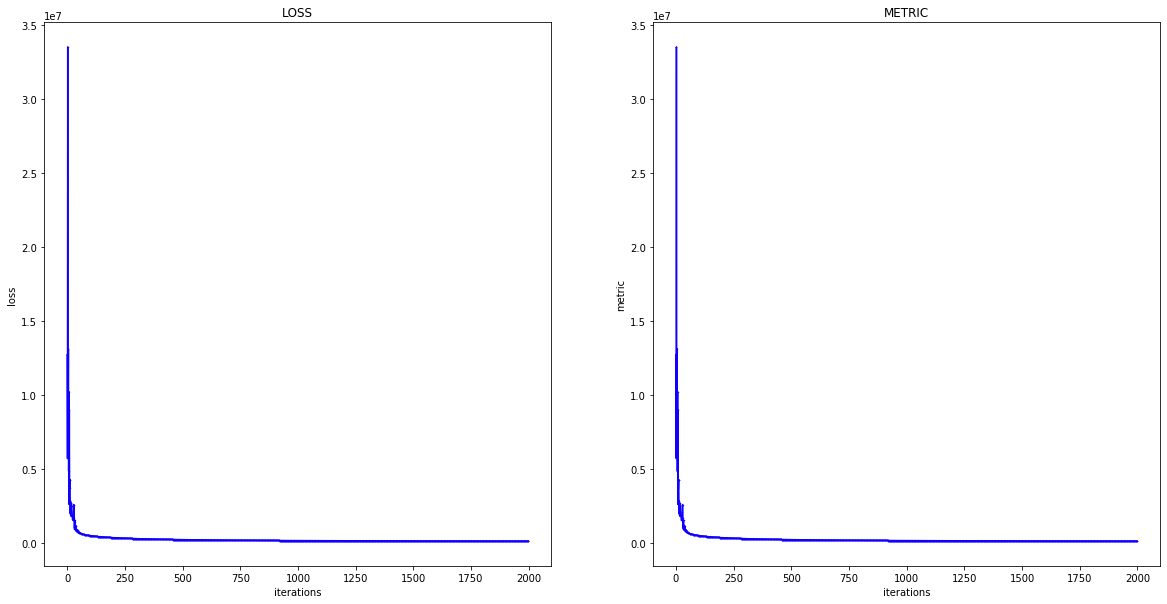

In [16]:
loss = pca.history['loss']
metric = pca.history['metric']

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('LOSS')
ax1.set_xlabel('iterations')
ax1.set_ylabel('loss')
ax1.plot(loss, marker='.', color='#0F00FF', markersize=1, linestyle='-')
ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('METRIC')
ax2.set_xlabel('iterations')
ax2.set_ylabel('metric')
ax2.plot(metric, marker='.', color='#0F00FF', markersize=1, linestyle='-')

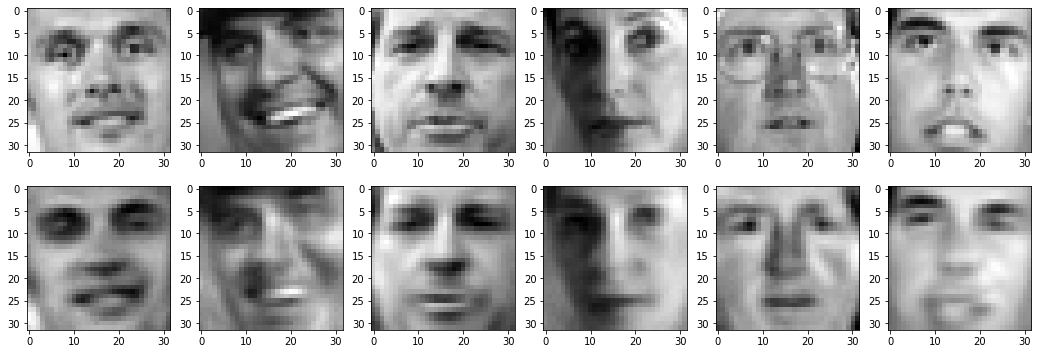

In [17]:
img_1 = np.rot90(np.fliplr(np.reshape(X_train[[0],:], newshape=(32,32))))
img_2 = np.rot90(np.fliplr(np.reshape(X_train[[1],:], newshape=(32,32))))
img_3 = np.rot90(np.fliplr(np.reshape(X_train[[2],:], newshape=(32,32))))
img_4 = np.rot90(np.fliplr(np.reshape(X_train[[3],:], newshape=(32,32))))
img_5 = np.rot90(np.fliplr(np.reshape(X_train[[4],:], newshape=(32,32))))
img_6 = np.rot90(np.fliplr(np.reshape(X_train[[5],:], newshape=(32,32))))

img_1_ = np.rot90(np.fliplr(np.reshape(pca.predict(X_train)[[0],:], newshape=(32,32))))
img_2_ = np.rot90(np.fliplr(np.reshape(pca.predict(X_train)[[1],:], newshape=(32,32))))
img_3_ = np.rot90(np.fliplr(np.reshape(pca.predict(X_train)[[2],:], newshape=(32,32))))
img_4_ = np.rot90(np.fliplr(np.reshape(pca.predict(X_train)[[3],:], newshape=(32,32))))
img_5_ = np.rot90(np.fliplr(np.reshape(pca.predict(X_train)[[4],:], newshape=(32,32))))
img_6_ = np.rot90(np.fliplr(np.reshape(pca.predict(X_train)[[5],:], newshape=(32,32))))

fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(2, 6, 1)
ax1.imshow(img_1, cmap='gray')
ax2 = fig.add_subplot(2, 6, 2)
ax2.imshow(img_2, cmap='gray')
ax3 = fig.add_subplot(2, 6, 3)
ax3.imshow(img_3, cmap='gray')
ax4 = fig.add_subplot(2, 6, 4)
ax4.imshow(img_4, cmap='gray')
ax5 = fig.add_subplot(2, 6, 5)
ax5.imshow(img_5, cmap='gray')
ax6 = fig.add_subplot(2, 6, 6)
ax6.imshow(img_6, cmap='gray')
ax7 = fig.add_subplot(2, 6, 7)
ax7.imshow(img_1_, cmap='gray')
ax8 = fig.add_subplot(2, 6, 8)
ax8.imshow(img_2_, cmap='gray')
ax9 = fig.add_subplot(2, 6, 9)
ax9.imshow(img_3_, cmap='gray')
ax10 = fig.add_subplot(2, 6, 10)
ax10.imshow(img_4_, cmap='gray')
ax11 = fig.add_subplot(2, 6, 11)
ax11.imshow(img_5_, cmap='gray')
ax12 = fig.add_subplot(2, 6, 12)
ax12.imshow(img_6_, cmap='gray')